# **Exploratory Data Analysis of Climatic Variables**

In [17]:
# Libraries
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data
df = pd.read_csv('AVONETplusClim.csv' )

## **1. Body Size (Mass)**

### **1.1. Mass and Temperature**

To choose the proper statistical test, Shapiro-Wilk test is done, in which

* H0: The Mass is normally distributed.
* H1: The Mass is not normally distributed.

In [18]:
shapiro_w, shapiro_p = stats.shapiro(df['Mass'])

print(f"N: {len(df['Mass'])}")
print(f"p-value: {shapiro_p:.4e}")

N: 9878
p-value: 5.6752e-113


/home/emrekisacik/miniconda3/envs/DSA210/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9878.
  res = hypotest_fun_out(*samples, **kwds)


Since p << 0.05, the null hypothesis (H0) is rejected. The data is not normally distributed. Therefore, parametric tests such as Pearson cannot be used. As an alternative, Spearman test is used, in which

* H0: There is no monotonic relationship between Mass and Minimum temperature.
* H1: There is a monotonic relationship between Mass and Minimum temperature.

In [19]:
correlation_rho, p_value_spearman = stats.spearmanr(df['bio_6'], df['Mass'])

print(f"Spearman rho: {correlation_rho:.4f}")
print(f"p-value: {p_value_spearman:.4e}")

Spearman rho: -0.0346
p-value: 5.9205e-04


* H0: There is no monotonic relationship between Mass and Maximum temperature.
* H1: There is a monotonic relationship between Mass and Maximum temperature.

In [20]:
correlation_rho, p_value_spearman = stats.spearmanr(df['bio_5'], df['Mass'])

print(f"Spearman rho: {correlation_rho:.4f}")
print(f"p-value: {p_value_spearman:.4e}")

Spearman rho: 0.0285
p-value: 4.6358e-03


* H0: There is no monotonic relationship between Mass and Average temperature.
* H1: There is a monotonic relationship between Mass and Average temperature.

In [21]:
correlation_rho, p_value_spearman = stats.spearmanr(df['bio_1'], df['Mass'])

print(f"Spearman rho: {correlation_rho:.4f}")
print(f"p-value: {p_value_spearman:.4e}")

Spearman rho: -0.0120
p-value: 2.3125e-01


For minimum and maximum temperature, p < 0.05, thus the null hypothesis (H0) is rejected. There is a statistically significant relationship between mass-minimum temperature and mass-maximum temperature. However, for average temperature, p > 0.05, thus the null hypothesis is failed to reject. Finally, to illustrate the relationship, scatter plots are created (with log(Mass) for better visualization).

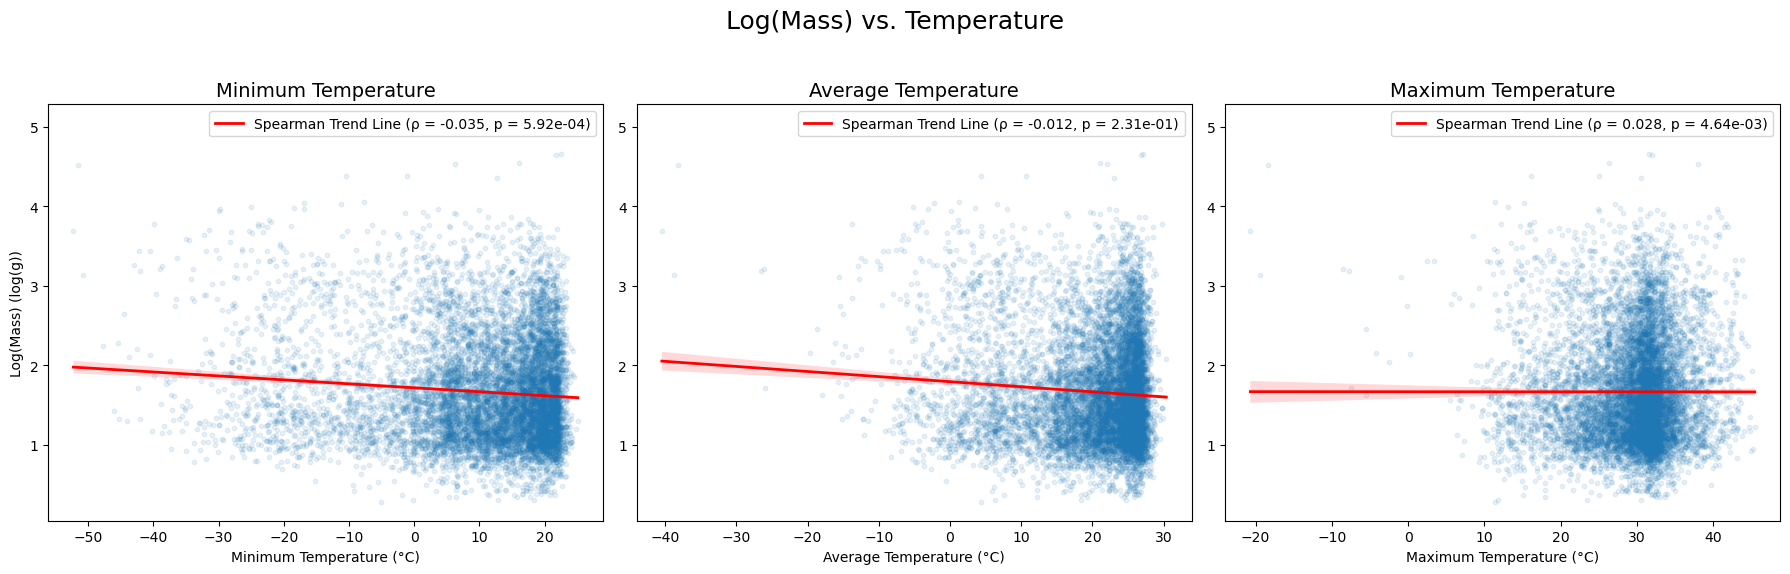

In [22]:
temp_cols = ['bio_6', 'bio_1', 'bio_5']

df['log_Mass'] = np.log10(df['Mass'])
df_temp = df[['log_Mass'] + temp_cols].copy()
df_melted = df_temp.melt(id_vars='log_Mass', var_name='Temperature_Type', value_name='Temperature_Value')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Log(Mass) vs. Temperature', fontsize=18)

label_map = {
    'bio_6': 'Minimum Temperature', 
    'bio_1': 'Average Temperature', 
    'bio_5': 'Maximum Temperature'
}

for i, col in enumerate(temp_cols):
    subset = df_melted[df_melted['Temperature_Type'] == col]

    rho, p = stats.spearmanr(subset['Temperature_Value'], subset['log_Mass'])

    sns.regplot(x='Temperature_Value', y='log_Mass', data=subset, ax=axes[i], 
        scatter_kws={'alpha': 0.1, 's': 10}, 
            line_kws={'color': 'red', 'lw': 2, 'label': f'Spearman Trend Line (ρ = {rho:.3f}, p = {p:.2e})'})

    axes[i].set_title(f"{label_map[col]}", fontsize=14)
    axes[i].set_xlabel(f"{label_map[col]} (°C)")
    axes[i].set_ylabel("Log(Mass) (log(g))" if i == 0 else "") 
    axes[i].legend(loc='upper right', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### **1.2. Mass and Precipitation**

Since Mass is not normally distributed, Spearman test is used, in which

* H0: There is no monotonic relationship between Mass and Precipitation.
* H1: There is a monotonic relationship between Mass and Precipitation.

In [23]:
correlation_rho, p_value_spearman = stats.spearmanr(df['bio_12'], df['Mass'])

print(f"Spearman rho: {correlation_rho:.4f}")
print(f"p-value: {p_value_spearman:.4e}")

Spearman rho: -0.0332
p-value: 9.6144e-04


Since p < 0.05, the null hypothesis (H0) is rejected. There is a statistically significant relationship between Mass and Precipitation. To illustrate the relationship, a scatter plot is created (with log(Mass) for better visualization).

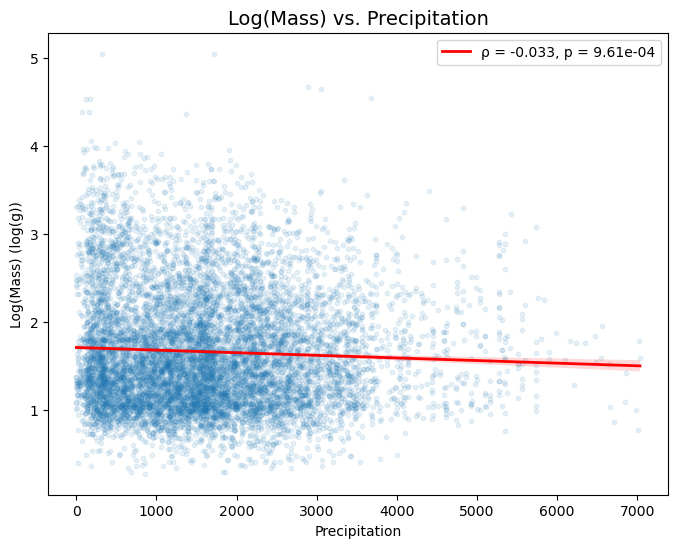

In [24]:
df['log_Mass'] = np.log10(df['Mass'])

rho, p = stats.spearmanr(df['bio_12'], df['log_Mass'], nan_policy='omit')

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

sns.regplot(
    x='bio_12', 
    y='log_Mass', 
    data=df, 
    ax=ax, 
    scatter_kws={'alpha': 0.1, 's': 10}, 
    line_kws={'color': 'red', 'lw': 2, 'label': f'ρ = {rho:.3f}, p = {p:.2e}'}
)

ax.set_title(f"Log(Mass) vs. Precipitation", fontsize=14)
ax.set_xlabel(f"Precipitation")
ax.set_ylabel(f"Log(Mass) (log(g))") 
ax.legend(loc='upper right', fontsize=10)

plt.show()

## **2. Leg Size (Tarsus Length)**

### **2.1. Tarsus Length and Temperature**

To choose the proper statistical test, Shapiro-Wilk test is done, in which

* H0: The Tarsus Length is normally distributed.
* H1: The Tarsus Length is not normally distributed.

In [25]:
shapiro_w, shapiro_p = stats.shapiro(df['Tarsus.Length'])

print(f"N: {len(df['Tarsus.Length'])}")
print(f"p-value: {shapiro_p:.4e}")

N: 9878
p-value: 2.1146e-94


/home/emrekisacik/miniconda3/envs/DSA210/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9878.
  res = hypotest_fun_out(*samples, **kwds)


Since p << 0.05, the null hypothesis (H0) is rejected. The data is not normally distributed. Therefore, parametric tests such as Pearson cannot be used. As an alternative, Spearman test is used, in which

* H0: There is no monotonic relationship between Tarsus Length and Minimum temperature.
* H1: There is a monotonic relationship between Tarsus Length and Minimum temperature.

In [26]:
correlation_rho, p_value_spearman = stats.spearmanr(df['bio_6'], df['Tarsus.Length'])

print(f"Spearman rho: {correlation_rho:.4f}")
print(f"p-value: {p_value_spearman:.4e}")

Spearman rho: -0.1208
p-value: 2.0783e-33


* H0: There is no monotonic relationship between Tarsus Length and Maximum temperature.
* H1: There is a monotonic relationship between Tarsus Length and Maximum temperature.

In [27]:
correlation_rho, p_value_spearman = stats.spearmanr(df['bio_5'], df['Tarsus.Length'])

print(f"Spearman rho: {correlation_rho:.4f}")
print(f"p-value: {p_value_spearman:.4e}")

Spearman rho: -0.0414
p-value: 3.8178e-05


* H0: There is no monotonic relationship between Tarsus Length and Average temperature.
* H1: There is a monotonic relationship between Tarsus Length and Average temperature.

In [28]:
correlation_rho, p_value_spearman = stats.spearmanr(df['bio_1'], df['Tarsus.Length'])

print(f"Spearman rho: {correlation_rho:.4f}")
print(f"p-value: {p_value_spearman:.4e}")

Spearman rho: -0.1028
p-value: 1.3158e-24


For minimum, maximum, and average temperature, p << 0.05, thus the null hypothesis (H0) is rejected. Overall, there is a statistically significant relationship between tarsus length and temperature. Finally, to illustrate the relationship, scatter plots are created (with log(Length) for better visualization).

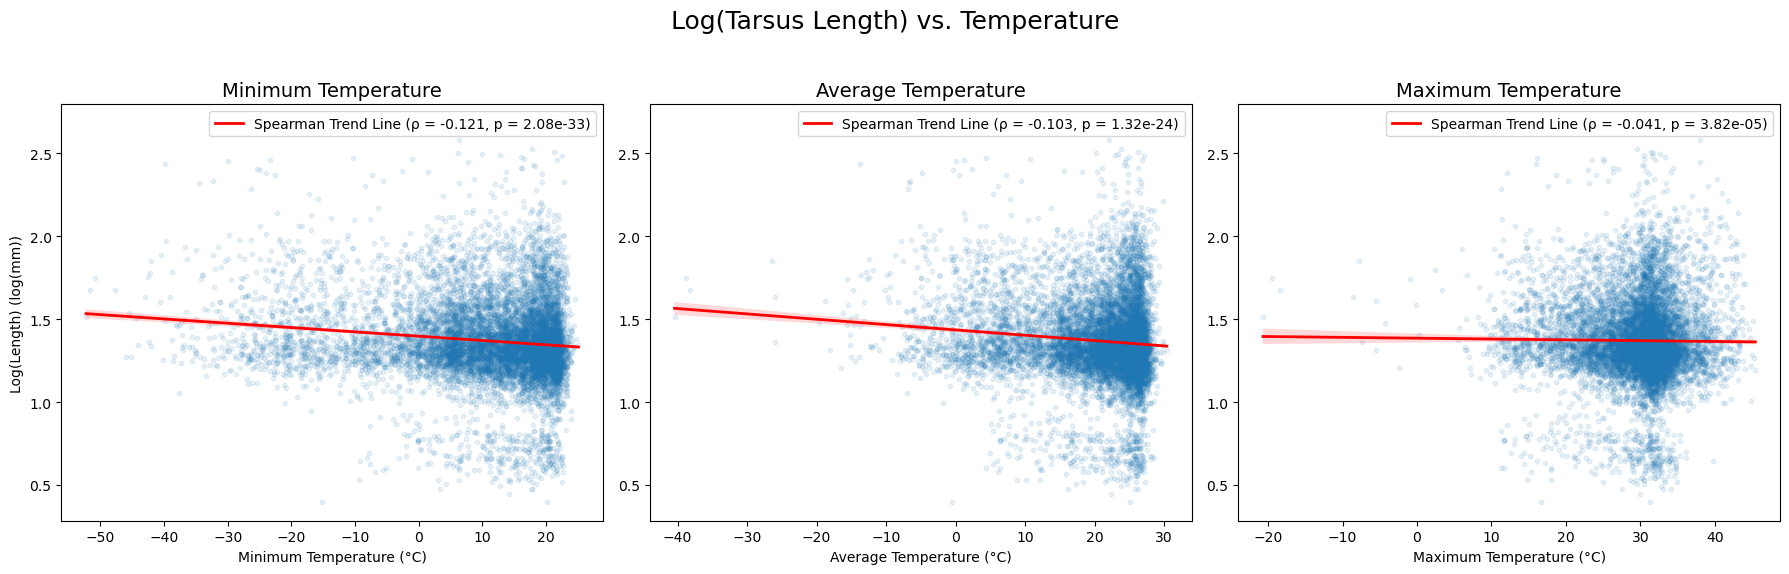

In [29]:
temp_cols = ['bio_6', 'bio_1', 'bio_5']

df['log_TarsusLength'] = np.log10(df['Tarsus.Length'])
df_temp = df[['log_TarsusLength'] + temp_cols].copy()
df_melted = df_temp.melt(id_vars='log_TarsusLength', var_name='Temperature_Type', value_name='Temperature_Value')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Log(Tarsus Length) vs. Temperature', fontsize=18)

label_map = {
    'bio_6': 'Minimum Temperature', 
    'bio_1': 'Average Temperature', 
    'bio_5': 'Maximum Temperature'
}

for i, col in enumerate(temp_cols):
    subset = df_melted[df_melted['Temperature_Type'] == col]

    rho, p = stats.spearmanr(subset['Temperature_Value'], subset['log_TarsusLength'])

    sns.regplot(x='Temperature_Value', y='log_TarsusLength', data=subset, ax=axes[i], 
        scatter_kws={'alpha': 0.1, 's': 10}, 
            line_kws={'color': 'red', 'lw': 2, 'label': f'Spearman Trend Line (ρ = {rho:.3f}, p = {p:.2e})'})

    axes[i].set_title(f"{label_map[col]}", fontsize=14)
    axes[i].set_xlabel(f"{label_map[col]} (°C)")
    axes[i].set_ylabel("Log(Length) (log(mm))" if i == 0 else "") 
    axes[i].legend(loc='upper right', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## **3. Tail Size (Tail Length)**

### **3.1. Tail Length and Temperature**

To choose the proper statistical test, Shapiro-Wilk test is done, in which

* H0: The Tail Length is normally distributed.
* H1: The Tail Length is not normally distributed.

In [30]:
shapiro_w, shapiro_p = stats.shapiro(df['Tail.Length'])

print(f"N: {len(df['Tail.Length'])}")
print(f"p-value: {shapiro_p:.4e}")

N: 9878
p-value: 4.3141e-83


/home/emrekisacik/miniconda3/envs/DSA210/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9878.
  res = hypotest_fun_out(*samples, **kwds)


Since p << 0.05, the null hypothesis (H0) is rejected. The data is not normally distributed. Therefore, parametric tests such as Pearson cannot be used. As an alternative, Spearman test is used, in which

* H0: There is no monotonic relationship between Tail Length and Minimum temperature.
* H1: There is a monotonic relationship between Tail Length and Minimum temperature.

In [31]:
correlation_rho, p_value_spearman = stats.spearmanr(df['bio_6'], df['Tail.Length'])

print(f"Spearman rho: {correlation_rho:.4f}")
print(f"p-value: {p_value_spearman:.4e}")

Spearman rho: -0.0630
p-value: 3.7094e-10


* H0: There is no monotonic relationship between Tail Length and Maximum temperature.
* H1: There is a monotonic relationship between Tail Length and Maximum temperature.

In [32]:
correlation_rho, p_value_spearman = stats.spearmanr(df['bio_5'], df['Tail.Length'])

print(f"Spearman rho: {correlation_rho:.4f}")
print(f"p-value: {p_value_spearman:.4e}")

Spearman rho: 0.0286
p-value: 4.4362e-03


* H0: There is no monotonic relationship between Tail Length and Average temperature.
* H1: There is a monotonic relationship between Tail Length and Average temperature.

In [33]:
correlation_rho, p_value_spearman = stats.spearmanr(df['bio_1'], df['Tail.Length'])

print(f"Spearman rho: {correlation_rho:.4f}")
print(f"p-value: {p_value_spearman:.4e}")

Spearman rho: -0.0294
p-value: 3.5092e-03


For minimum, maximum, and average temperature, p < 0.05, thus the null hypothesis (H0) is rejected. Overall, there is a statistically significant relationship between tail length and temperature. Finally, to illustrate the relationship, scatter plots are created (with log(Length) for better visualization).

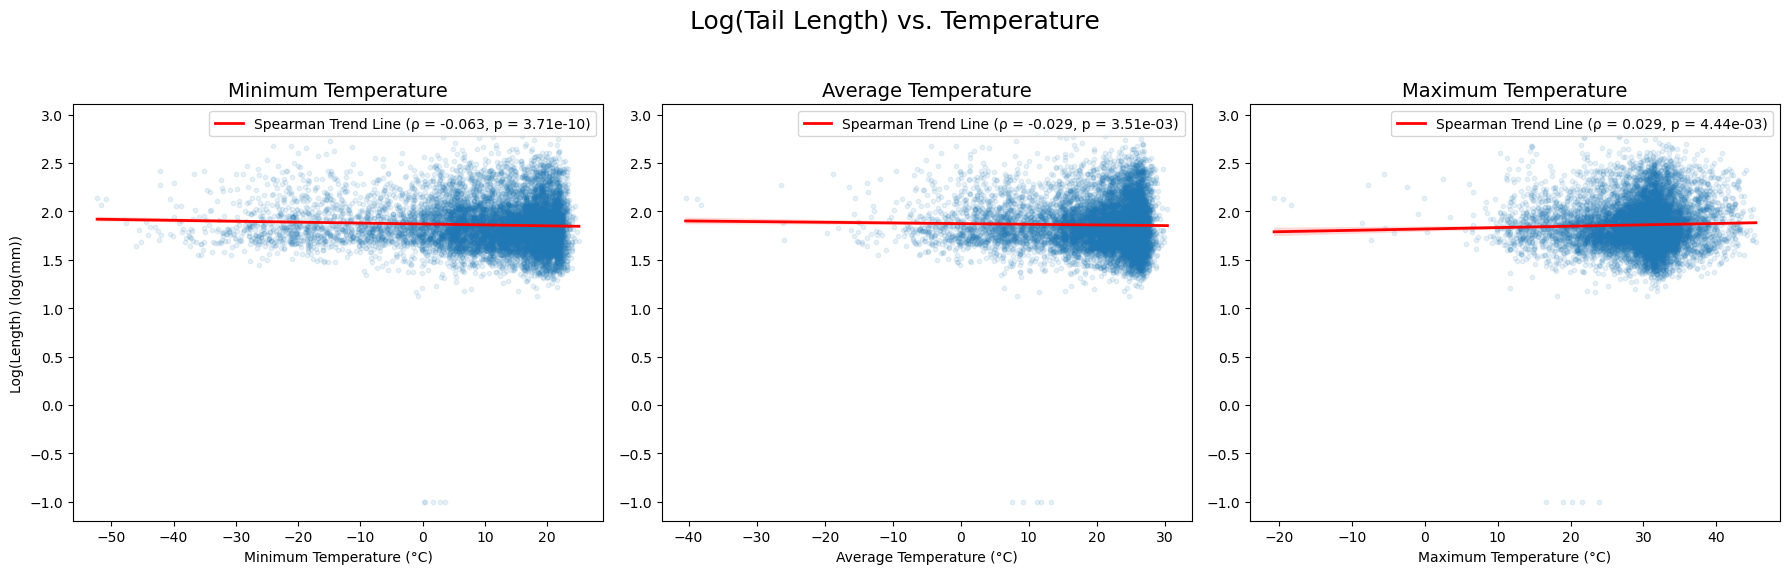

In [34]:
temp_cols = ['bio_6', 'bio_1', 'bio_5']

df['log_TailLength'] = np.log10(df['Tail.Length'])
df_temp = df[['log_TailLength'] + temp_cols].copy()
df_melted = df_temp.melt(id_vars='log_TailLength', var_name='Temperature_Type', value_name='Temperature_Value')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Log(Tail Length) vs. Temperature', fontsize=18)

label_map = {
    'bio_6': 'Minimum Temperature', 
    'bio_1': 'Average Temperature', 
    'bio_5': 'Maximum Temperature'
}

for i, col in enumerate(temp_cols):
    subset = df_melted[df_melted['Temperature_Type'] == col]

    rho, p = stats.spearmanr(subset['Temperature_Value'], subset['log_TailLength'])

    sns.regplot(x='Temperature_Value', y='log_TailLength', data=subset, ax=axes[i], 
        scatter_kws={'alpha': 0.1, 's': 10}, 
            line_kws={'color': 'red', 'lw': 2, 'label': f'Spearman Trend Line (ρ = {rho:.3f}, p = {p:.2e})'})

    axes[i].set_title(f"{label_map[col]}", fontsize=14)
    axes[i].set_xlabel(f"{label_map[col]} (°C)")
    axes[i].set_ylabel("Log(Length) (log(mm))" if i == 0 else "") 
    axes[i].legend(loc='upper right', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## **4. Wing Size (Wing Length and Hand-Wing Index)**

### **4.1. Wing Length and Temperature**

To choose the proper statistical test, Shapiro-Wilk test is done, in which

* H0: The Wing Length is normally distributed.
* H1: The Wing Length is not normally distributed.

In [35]:
shapiro_w, shapiro_p = stats.shapiro(df['Wing.Length'])

print(f"N: {len(df['Wing.Length'])}")
print(f"p-value: {shapiro_p:.4e}")

N: 9878
p-value: 8.2397e-84


/home/emrekisacik/miniconda3/envs/DSA210/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9878.
  res = hypotest_fun_out(*samples, **kwds)


Since p << 0.05, the null hypothesis (H0) is rejected. The data is not normally distributed. Therefore, parametric tests such as Pearson cannot be used. As an alternative, Spearman test is used, in which

* H0: There is no monotonic relationship between Wing Length and Minimum temperature.
* H1: There is a monotonic relationship between Wing Length and Minimum temperature.

In [36]:
correlation_rho, p_value_spearman = stats.spearmanr(df['bio_6'], df['Wing.Length'])

print(f"Spearman rho: {correlation_rho:.4f}")
print(f"p-value: {p_value_spearman:.4e}")

Spearman rho: -0.0652
p-value: 9.0137e-11


* H0: There is no monotonic relationship between Wing Length and Maximum temperature.
* H1: There is a monotonic relationship between Wing Length and Maximum temperature.

In [37]:
correlation_rho, p_value_spearman = stats.spearmanr(df['bio_5'], df['Wing.Length'])

print(f"Spearman rho: {correlation_rho:.4f}")
print(f"p-value: {p_value_spearman:.4e}")

Spearman rho: 0.0319
p-value: 1.5387e-03


* H0: There is no monotonic relationship between Wing Length and Average temperature.
* H1: There is a monotonic relationship between Wing Length and Average temperature.

In [38]:
correlation_rho, p_value_spearman = stats.spearmanr(df['bio_1'], df['Wing.Length'])

print(f"Spearman rho: {correlation_rho:.4f}")
print(f"p-value: {p_value_spearman:.4e}")

Spearman rho: -0.0323
p-value: 1.3236e-03


For minimum, maximum, and average temperature, p < 0.05, thus the null hypothesis (H0) is rejected. Overall, there is a statistically significant relationship between tail length and temperature. Finally, to illustrate the relationship, scatter plots are created (with log(Length) for better visualization).

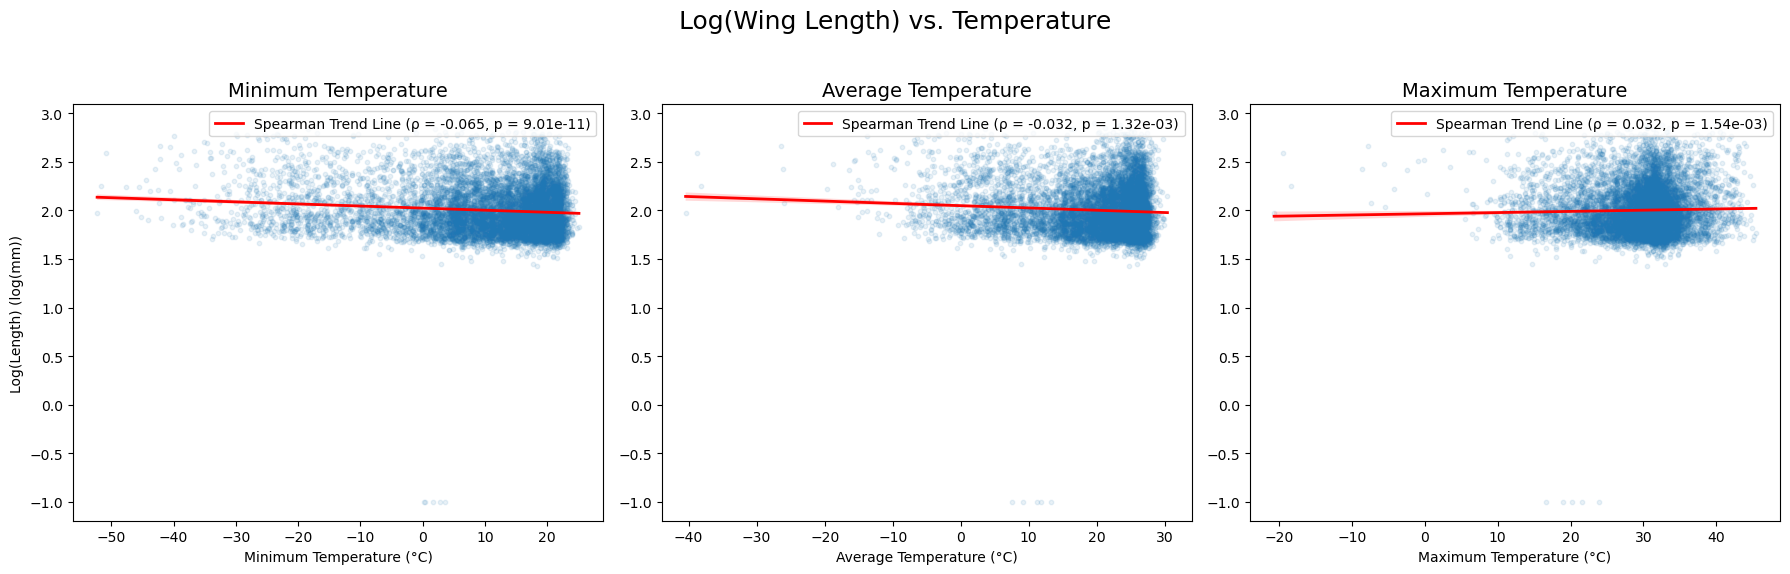

In [39]:
temp_cols = ['bio_6', 'bio_1', 'bio_5']

df['log_WingLength'] = np.log10(df['Wing.Length'])
df_temp = df[['log_WingLength'] + temp_cols].copy()
df_melted = df_temp.melt(id_vars='log_WingLength', var_name='Temperature_Type', value_name='Temperature_Value')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Log(Wing Length) vs. Temperature', fontsize=18)

label_map = {
    'bio_6': 'Minimum Temperature', 
    'bio_1': 'Average Temperature', 
    'bio_5': 'Maximum Temperature'
}

for i, col in enumerate(temp_cols):
    subset = df_melted[df_melted['Temperature_Type'] == col]

    rho, p = stats.spearmanr(subset['Temperature_Value'], subset['log_WingLength'])

    sns.regplot(x='Temperature_Value', y='log_WingLength', data=subset, ax=axes[i], 
        scatter_kws={'alpha': 0.1, 's': 10}, 
            line_kws={'color': 'red', 'lw': 2, 'label': f'Spearman Trend Line (ρ = {rho:.3f}, p = {p:.2e})'})

    axes[i].set_title(f"{label_map[col]}", fontsize=14)
    axes[i].set_xlabel(f"{label_map[col]} (°C)")
    axes[i].set_ylabel("Log(Length) (log(mm))" if i == 0 else "") 
    axes[i].legend(loc='upper right', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### **4.2. Hand-Wing Index (HWI) and Temperature**

To choose the proper statistical test, Shapiro-Wilk test is done, in which

* H0: The HWI is normally distributed.
* H1: The HWI is not normally distributed.

In [40]:
shapiro_w, shapiro_p = stats.shapiro(df['Hand-Wing.Index'])

print(f"N: {len(df['Hand-Wing.Index'])}")
print(f"p-value: {shapiro_p:.4e}")

N: 9878
p-value: 3.7465e-65


/home/emrekisacik/miniconda3/envs/DSA210/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9878.
  res = hypotest_fun_out(*samples, **kwds)


Since p << 0.05, the null hypothesis (H0) is rejected. The data is not normally distributed. Therefore, parametric tests such as Pearson cannot be used. As an alternative, Spearman test is used, in which

* H0: There is no monotonic relationship between HWI and Minimum temperature.
* H1: There is a monotonic relationship between HWI and Minimum temperature.

In [41]:
correlation_rho, p_value_spearman = stats.spearmanr(df['bio_6'], df['Hand-Wing.Index'])

print(f"Spearman rho: {correlation_rho:.4f}")
print(f"p-value: {p_value_spearman:.4e}")

Spearman rho: -0.1675
p-value: 4.3346e-63


* H0: There is no monotonic relationship between HWI and Maximum temperature.
* H1: There is a monotonic relationship between HWI and Maximum temperature.

In [42]:
correlation_rho, p_value_spearman = stats.spearmanr(df['bio_5'], df['Hand-Wing.Index'])

print(f"Spearman rho: {correlation_rho:.4f}")
print(f"p-value: {p_value_spearman:.4e}")

Spearman rho: 0.0015
p-value: 8.7902e-01


* H0: There is no monotonic relationship between HWI and Average temperature.
* H1: There is a monotonic relationship between HWI and Average temperature.

In [43]:
correlation_rho, p_value_spearman = stats.spearmanr(df['bio_1'], df['Hand-Wing.Index'])

print(f"Spearman rho: {correlation_rho:.4f}")
print(f"p-value: {p_value_spearman:.4e}")

Spearman rho: -0.1227
p-value: 2.0130e-34


For minimum and average temperature, p < 0.05, thus the null hypothesis (H0) is rejected. There is a statistically significant relationship between mass-minimum temperature and mass-average temperature. However, for maximum temperature, p > 0.05, thus the null hypothesis is failed to reject. Finally, to illustrate the relationship, scatter plots are created (with log() for better visualization).

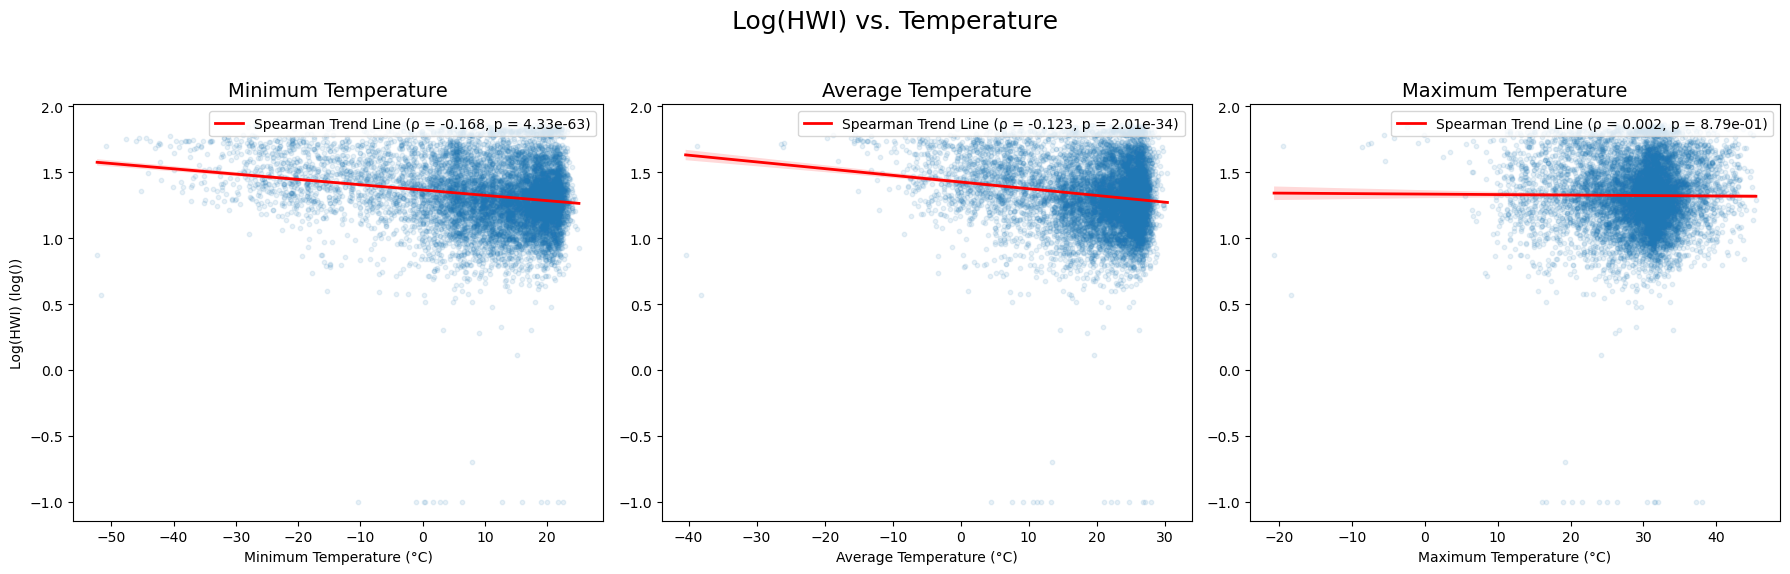

In [44]:
temp_cols = ['bio_6', 'bio_1', 'bio_5']

df['log_HWI'] = np.log10(df['Hand-Wing.Index'])
df_temp = df[['log_HWI'] + temp_cols].copy()
df_melted = df_temp.melt(id_vars='log_HWI', var_name='Temperature_Type', value_name='Temperature_Value')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Log(HWI) vs. Temperature', fontsize=18)

label_map = {
    'bio_6': 'Minimum Temperature', 
    'bio_1': 'Average Temperature', 
    'bio_5': 'Maximum Temperature'
}

for i, col in enumerate(temp_cols):
    subset = df_melted[df_melted['Temperature_Type'] == col]

    rho, p = stats.spearmanr(subset['Temperature_Value'], subset['log_HWI'])

    sns.regplot(x='Temperature_Value', y='log_HWI', data=subset, ax=axes[i], 
        scatter_kws={'alpha': 0.1, 's': 10}, 
            line_kws={'color': 'red', 'lw': 2, 'label': f'Spearman Trend Line (ρ = {rho:.3f}, p = {p:.2e})'})

    axes[i].set_title(f"{label_map[col]}", fontsize=14)
    axes[i].set_xlabel(f"{label_map[col]} (°C)")
    axes[i].set_ylabel("Log(HWI) (log())" if i == 0 else "") 
    axes[i].legend(loc='upper right', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## **5. Beak Size**

### **5.1. Beak Length and Temperature**

To choose the proper statistical test, Shapiro-Wilk test is done, in which

* H0: The Beak Length is normally distributed.
* H1: The Beak Length is not normally distributed.

In [45]:
shapiro_w, shapiro_p = stats.shapiro(df['Beak.Length_Culmen'])

print(f"N: {len(df['Beak.Length_Culmen'])}")
print(f"p-value: {shapiro_p:.4e}")

N: 9878
p-value: 6.4255e-96


/home/emrekisacik/miniconda3/envs/DSA210/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9878.
  res = hypotest_fun_out(*samples, **kwds)


Since p << 0.05, the null hypothesis (H0) is rejected. The data is not normally distributed. Therefore, parametric tests such as Pearson cannot be used. As an alternative, Spearman test is used, in which

* H0: There is no monotonic relationship between Beak Length and Minimum temperature.
* H1: There is a monotonic relationship between Beak Length and Minimum temperature.

In [46]:
correlation_rho, p_value_spearman = stats.spearmanr(df['bio_6'], df['Beak.Length_Culmen'])

print(f"Spearman rho: {correlation_rho:.4f}")
print(f"p-value: {p_value_spearman:.4e}")

Spearman rho: 0.0492
p-value: 9.7508e-07


* H0: There is no monotonic relationship between Beak Length and Maximum temperature.
* H1: There is a monotonic relationship between Beak Length and Maximum temperature.

In [47]:
correlation_rho, p_value_spearman = stats.spearmanr(df['bio_5'], df['Beak.Length_Culmen'])

print(f"Spearman rho: {correlation_rho:.4f}")
print(f"p-value: {p_value_spearman:.4e}")

Spearman rho: 0.0242
p-value: 1.6180e-02


* H0: There is no monotonic relationship between Beak Length and Average temperature.
* H1: There is a monotonic relationship between Beak Length and Average temperature.

In [48]:
correlation_rho, p_value_spearman = stats.spearmanr(df['bio_1'], df['Beak.Length_Culmen'])

print(f"Spearman rho: {correlation_rho:.4f}")
print(f"p-value: {p_value_spearman:.4e}")

Spearman rho: 0.0456
p-value: 5.7400e-06


For minimum, maximum, and average temperature, p < 0.05, thus the null hypothesis (H0) is rejected. Overall, there is a statistically significant relationship between beak length and temperature. Finally, to illustrate the relationship, scatter plots are created (with log(Length) for better visualization).

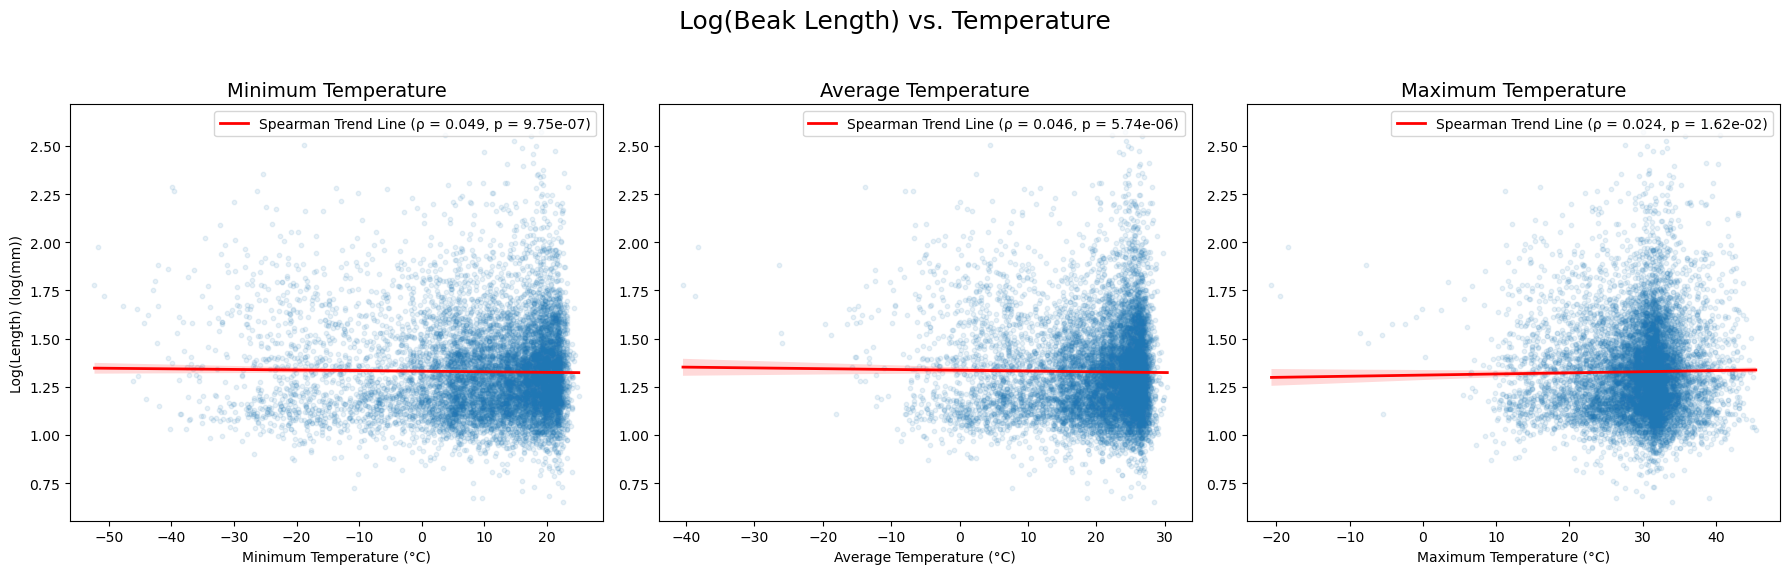

In [49]:
temp_cols = ['bio_6', 'bio_1', 'bio_5']

df['log_BeakLength'] = np.log10(df['Beak.Length_Culmen'])
df_temp = df[['log_BeakLength'] + temp_cols].copy()
df_melted = df_temp.melt(id_vars='log_BeakLength', var_name='Temperature_Type', value_name='Temperature_Value')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Log(Beak Length) vs. Temperature', fontsize=18)

label_map = {
    'bio_6': 'Minimum Temperature', 
    'bio_1': 'Average Temperature', 
    'bio_5': 'Maximum Temperature'
}

for i, col in enumerate(temp_cols):
    subset = df_melted[df_melted['Temperature_Type'] == col]

    rho, p = stats.spearmanr(subset['Temperature_Value'], subset['log_BeakLength'])

    sns.regplot(x='Temperature_Value', y='log_BeakLength', data=subset, ax=axes[i], 
        scatter_kws={'alpha': 0.1, 's': 10}, 
            line_kws={'color': 'red', 'lw': 2, 'label': f'Spearman Trend Line (ρ = {rho:.3f}, p = {p:.2e})'})

    axes[i].set_title(f"{label_map[col]}", fontsize=14)
    axes[i].set_xlabel(f"{label_map[col]} (°C)")
    axes[i].set_ylabel("Log(Length) (log(mm))" if i == 0 else "") 
    axes[i].legend(loc='upper right', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### **5.2. Beak Size and Precipitation**

Since Beak Length is not normally distributed, Spearman test is used, in which

* H0: There is no monotonic relationship between Beak Length and Precipitation.
* H1: There is a monotonic relationship between Beak Length and Precipitation.

In [55]:
correlation_rho, p_value_spearman = stats.spearmanr(df['bio_12'], df['Beak.Length_Culmen'])

print(f"Spearman rho: {correlation_rho:.4f}")
print(f"p-value: {p_value_spearman:.4e}")

Spearman rho: 0.0499
p-value: 7.1455e-07


Since p < 0.05, the null hypothesis (H0) is rejected. There is a statistically significant relationship between Beak Length and Precipitation. To illustrate the relationship, a scatter plot is created (with log(Length) for better visualization).

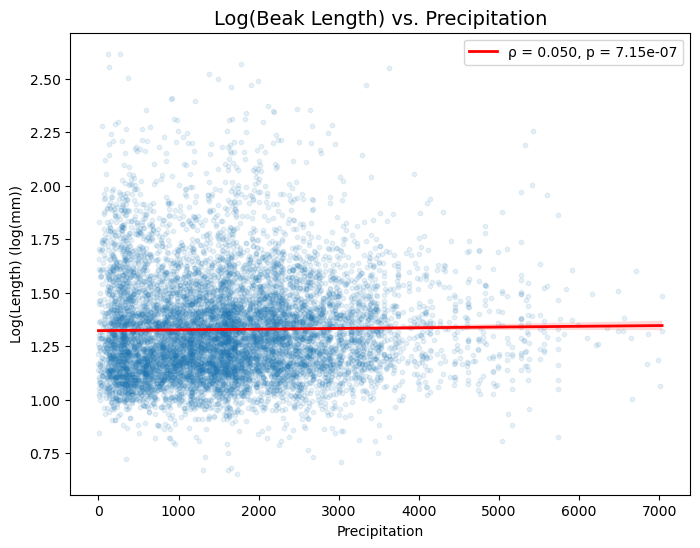

In [56]:
df['log_BeakLength'] = np.log10(df['Beak.Length_Culmen'])

rho, p = stats.spearmanr(df['bio_12'], df['log_BeakLength'], nan_policy='omit')

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

sns.regplot(
    x='bio_12', 
    y='log_BeakLength', 
    data=df, 
    ax=ax, 
    scatter_kws={'alpha': 0.1, 's': 10}, 
    line_kws={'color': 'red', 'lw': 2, 'label': f'ρ = {rho:.3f}, p = {p:.2e}'}
)

ax.set_title(f"Log(Beak Length) vs. Precipitation", fontsize=14)
ax.set_xlabel(f"Precipitation")
ax.set_ylabel(f"Log(Length) (log(mm))") 
ax.legend(loc='upper right', fontsize=10)

plt.show()